In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [104]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
print("\n\n\t\t\t\t\t\t\t\t\tHELLOOO!\n\n")



									HELLOOO!




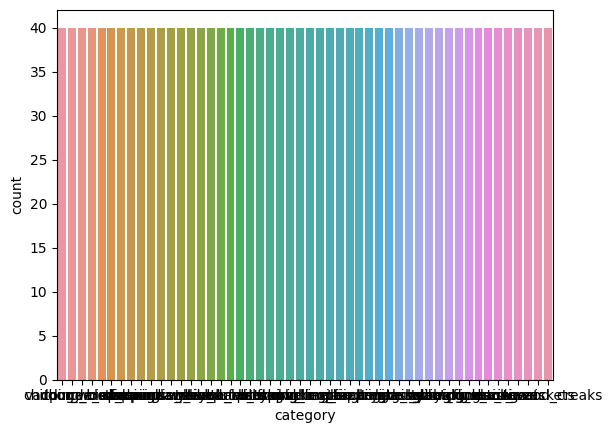

In [76]:
# Directories and files
audio_dir = '/kaggle/input/environmental-sound-classification-50/audio/audio'
csv_file = '/kaggle/input/environmental-sound-classification-50/esc50.csv'

# Read and preprocess the labels
csv_labels = pd.read_csv(csv_file)
csv_labels = csv_labels[['filename', 'category']]
sns.countplot(x=csv_labels["category"])
plt.show()

In [77]:
len(csv_labels['category'].unique())
print("\n")
csv_labels['category'].value_counts()

category
dog                 40
glass_breaking      40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
snoring             40
chirping_birds      40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          40
sneezing            40
rooster             40
sea_waves           40
siren               40
cat                 40
door_wood_creaks    40
helicopter          40
crackling_fire      40
car_horn            40
brushing_teeth      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
cl

In [80]:
# Function to extract MFCC features
def extract_mfcc(filename, n_mfcc=40):
    y, sr = librosa.load(filename, duration=5, offset=0.5)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)
    return mfccs

In [81]:
# Extract features and labels
features = []
labels = []
for idx, row in csv_labels.iterrows():
    file_path = os.path.join(audio_dir, row['filename'])
    mfcc = extract_mfcc(file_path)
    features.append(mfcc)
    labels.append(row['category'])

In [105]:
# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = tf.keras.utils.to_categorical(labels_encoded, num_classes=50)

In [106]:
# Convert to numpy arrays
X = np.array(features)
y = np.array(labels_onehot)

In [84]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [96]:
# Build the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(40,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(50, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,754 (65.45 KB)

 Trainable params: 16,754 (65.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8802 - loss: 0.3971 - val_accuracy: 0.4575 - val_loss: 3.1607
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.4568 - val_accuracy: 0.4350 - val_loss: 3.1599
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.4202 - val_accuracy: 0.4325 - val_loss: 3.2016
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.4189 - val_accuracy: 0.4625 - val_loss: 3.1776
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.4111 - val_accuracy: 0.4350 - val_loss: 3.2891
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.3807 - val_accuracy: 0.4450 - val_loss: 3.2602
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.4167 - val_accuracy: 0.4375 - val_loss: 3.2533
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.4127 - val_accuracy: 0.4350 - v

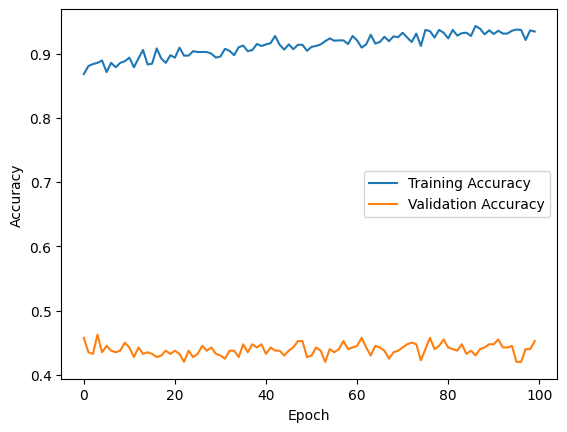

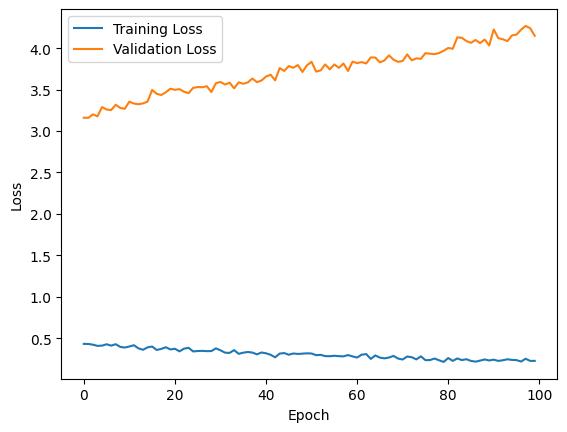

In [107]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate and plot results
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")

import matplotlib.pyplot as plt
results = model.evaluate(Xtrain, Ytrain)
print("\nLoss = ",results[0])
print("\nAccuracy = ",results[1]*100,"%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()